In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
df=pd.read_csv("HR-Employee-Attrition.csv")

In [ ]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,2,1,1,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,49,No,279,8,1,1,2,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1373,2,2,1,4,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1392,3,4,1,5,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,27,No,591,2,1,1,7,1,Male,40,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df['Gender']=df['Gender'].map({'Female' : 1, 
                                 'Male' : 0})

In [ ]:
df['Attrition']=df['Attrition'].map({'Yes' : 1, 
                                     'No' : 0})

In [ ]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
x=df.drop(["Attrition"], axis=1)
y=df['Attrition']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train )

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8559782608695652
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       320
           1       0.35      0.12      0.18        48

    accuracy                           0.86       368
   macro avg       0.62      0.55      0.55       368
weighted avg       0.81      0.86      0.82       368

Confusion matrix: 
 [[309  11]
 [ 42   6]]


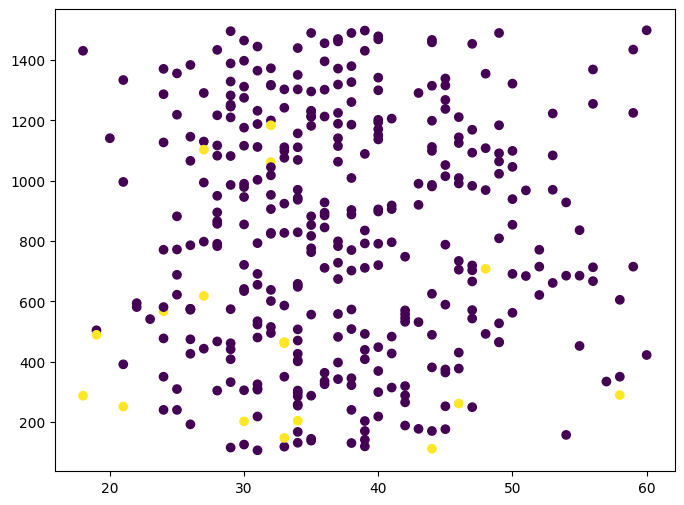

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_test["Age"], x_test["DailyRate"], c=y_pred)
plt.show()